# Explore Popularity of FordGoBike 
## by Sahn

## Investigation Overview

In this project, I am going to focus on the popularity of FordGobike among different types of variables. Is there a specific gender who prefers FordGoBike? What is the age group that uses FordGobike the most? When is the popular time to use FordGobike? 


## Dataset Overview

The project uses 6 FordGoBike trip datasets. Data contain trip data between January 2019 and June 2019. Each month has about 200,000 trip data. Raw datasets were combined into one and missing/invalid data were cleaned from analysis. 

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load cleaned data table into a pandas dataframe
df_tripinfo = pd.read_csv('fordgobike_2019_1-6_tripinfo.csv')
df_userinfo = pd.read_csv('fordgobike_2019_1-6_userinfo.csv')

## FordGoBike & Rider Data

Three types of rider's data were given in the dataset: Gender, Type, and Birth Year. More males use FordGoBike then other genders. Most of FordGoBike riders are subscribers. Lastly, majority of riders' birth years are in 1980's or 1990's. One thing to note about the birth year is that we have a rider who has their birth year in 1870's. This is highly unlikely. If further investigation is needed using the birth year, data validity may need to be considered carefully. 

In [5]:
# Age group per decades: 
agegroup = (np.trunc(df_userinfo['user_birth_year']/10))*10
agegroup = agegroup.astype('int64')
df_userinfo['agegroup'] = agegroup;

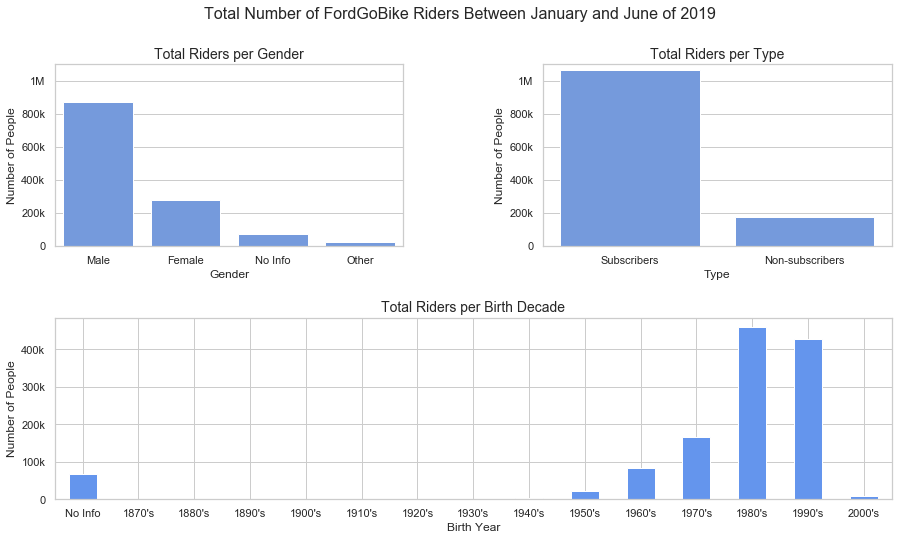

In [8]:
fig = plt.figure(figsize = [15, 8])
fig.subplots_adjust(hspace=0.4, wspace=0.4)
sb.set(style="whitegrid")

fig.add_subplot(2, 2, 1)
sb.countplot(data = df_userinfo, x = 'user_gender', color = 'CornflowerBlue');
plt.xlabel('Gender', fontsize=12);
plt.ylabel('Number of People', fontsize=12);
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000], ('0', '200k', '400k', '600k', '800k', '1M'));
plt.ylim(bottom = 0, top = 1100000)
plt.title('Total Riders per Gender', fontsize=14);

fig.add_subplot(2, 2, 2)
sb.countplot(data = df_userinfo, x = 'user_type', color = 'CornflowerBlue');
plt.xlabel('Type', fontsize=12)
plt.xticks([0, 1], ('Subscribers', 'Non-subscribers'));
plt.ylabel('Number of People', fontsize=12)
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000], ('0', '200k', '400k', '600k', '800k', '1M'));
plt.ylim(bottom = 0, top = 1100000)
plt.title('Total Riders per Type', fontsize=14)

fig.add_subplot(2, 1, 2)
df_userinfo['agegroup'].groupby(agegroup).count().plot(kind="bar", color = 'CornflowerBlue');
plt.xlabel('Birth Year', fontsize=12)
plt.xticks(np.arange(0, np.shape(df_userinfo['agegroup'].groupby(agegroup).count())[0], 1),
           ('No Info', '1870\'s', '1880\'s', '1890\'s', '1900\'s', '1910\'s', '1920\'s', '1930\'s',
           '1940\'s', '1950\'s', '1960\'s', '1970\'s', '1980\'s', '1990\'s', '2000\'s'), rotation='horizontal');
plt.ylabel('Number of People', fontsize=12)
plt.yticks([0, 100000, 200000, 300000, 400000], ('0', '100k', '200k', '300k', '400k'));
# plt.ylim(bottom = 0, top = 1100000)
plt.title('Total Riders per Birth Decade', fontsize=14)

fig.suptitle("Total Number of FordGoBike Riders Between January and June of 2019",fontsize = 16);

## FordGoBike & Month/Time 

There are two types of Date and Time data: start date/time and end date/time. Two types of data don't show much difference in its relationship to date/time. In fact, plot overlaps nearly perfectly. Riders ride FordGoBike in March the most. Both start and end data indicate March as the most popular month. Note that the plot shows July because there are some observations that riders rent a bike on the last day of June and returned on July 1st. Similar to Month, both start and end data show two picks in the time of the day: one in the morning (~ 8 AM) and one in the late afternoon (~ 5 PM).

In [7]:
# Convert object to datetime 
df_tripinfo['start_date_time'] = pd.to_datetime(df_tripinfo['start_date_time'])
df_tripinfo['end_date_time'] = pd.to_datetime(df_tripinfo['end_date_time'])

In [21]:
print(df_tripinfo["start_date_time"].max())
print(df_tripinfo["end_date_time"].max())

2019-06-30 23:58:44.099000
2019-07-01 16:57:45.592000


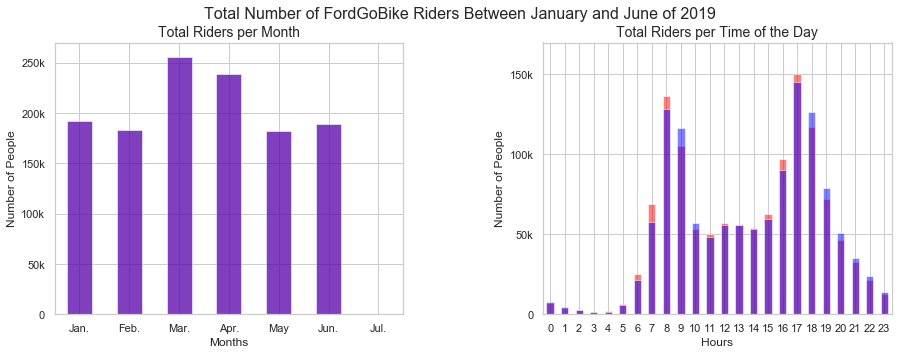

In [84]:
fig2 = plt.figure(figsize = [15, 5])
fig2.subplots_adjust(hspace=0.4, wspace=0.4)
sb.set(style="whitegrid")

fig2.add_subplot(1, 2, 1)
(df_tripinfo['start_date_time'].groupby(df_tripinfo["start_date_time"].dt.month).count()
     .plot(kind="bar", color = 'red', alpha = 0.5))
(df_tripinfo['end_date_time'].groupby(df_tripinfo["end_date_time"].dt.month).count()
 .plot(kind="bar", color = 'blue', alpha = 0.5))          
plt.xlabel('Months', fontsize=12)
plt.xticks([0, 1, 2, 3, 4, 5, 6], 
            ('Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.'),
            rotation = 'horizontal')
plt.ylabel('Number of People', fontsize=12)
plt.yticks([0, 50000, 100000, 150000, 200000, 250000], ('0', '50k', '100k', '150k', '200k', '250k'));
plt.ylim(bottom = 0, top = 270000)
plt.title('Total Riders per Month', fontsize=14)

ax = fig2.add_subplot(1, 2, 2)
(df_tripinfo['start_date_time'].groupby(df_tripinfo["start_date_time"].dt.hour).count()
 .plot(kind="bar", color = 'red', alpha = 0.5))
(df_tripinfo['end_date_time'].groupby(df_tripinfo["end_date_time"].dt.hour).count()
 .plot(kind="bar", color = 'blue', alpha = 0.5))
plt.xlabel('Hours', fontsize = 12);
plt.xticks(rotation = 'horizontal');
plt.yticks([0, 50000, 100000, 150000], ('0', '50k', '100k', '150k'));
plt.ylabel('Number of People', fontsize=12)
plt.ylim(bottom = 0, top = 170000)
plt.title('Total Riders per Time of the Day', fontsize=14)

fig2.suptitle("Total Number of FordGoBike Riders Between January and June of 2019", fontsize = 16);

## FordGoBike &Cities

When plotting ladtitude and longtitude, three clusters are observed, which means FordGoBike data is collected from three cities. Using Google Maps, each clusters were identified. The bottom cluster is San Francisco area, the one above San Francisco is Berkeley area, and the top cluster is San Jose area. Heatmap claerly shows San Francisco uses FordGoBike the most. 

In [73]:
# Remove outliers 
df_loc = df_tripinfo.loc[df_tripinfo['start_station_latitude'] > 10]
df_loc = df_loc.loc[df_loc['start_station_latitude'] < 40]

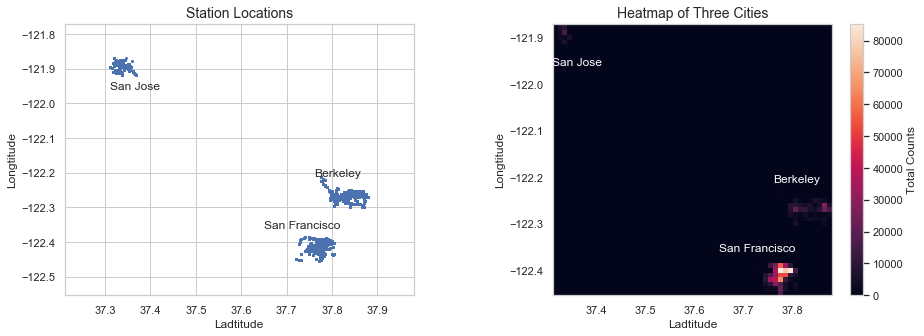

In [86]:
fig3 = plt.figure(figsize = [15, 5])
fig3.subplots_adjust(hspace=0.4, wspace=0.4)
sb.set(style="whitegrid")

fig3.add_subplot(1, 2, 1)
sb.regplot(data = df_loc, x = 'start_station_latitude', y = 'start_station_longitude', fit_reg = False,
           x_jitter = 0.00001, y_jitter = 0.00001, scatter_kws = {'alpha' : 1/3, 's':2})
plt.ylim(top=df_loc['start_station_longitude'].max()+0.1,  bottom = df_loc['start_station_longitude'].min()-0.1);
plt.xlim(left=df_loc['start_station_latitude'].min()-0.1,  right = df_loc['start_station_latitude'].max()+0.1);
plt.text(37.31, -121.96, 'San Jose', fontsize=12)
plt.text(37.76, -122.21, 'Berkeley', fontsize=12)
plt.text(37.65, -122.36, 'San Francisco', fontsize=12)
plt.xlabel('Ladtitude', fontsize = 12);
plt.ylabel('Longtitude', fontsize = 12);
plt.title('Station Locations', fontsize = 14);

fig3.add_subplot(1, 2, 2)
bins_x = np.arange(df_loc['start_station_latitude'].min(), 
                   df_loc['start_station_latitude'].min()+
                   df_loc['start_station_longitude'].max()-
                   df_loc['start_station_longitude'].min(), 0.01)
bins_y = np.arange(df_loc['start_station_longitude'].min(), 
                   df_loc['start_station_longitude'].max(), 0.01)
plt.hist2d(data = df_loc, x = 'start_station_latitude', y = 'start_station_longitude',
           bins = [bins_x, bins_y])
cbar = plt.colorbar();
plt.ylim(top=df_loc['start_station_longitude'].max(),  bottom = df_loc['start_station_longitude'].min());
plt.xlim(left=df_loc['start_station_latitude'].min(),  right = df_loc['start_station_latitude'].max());
plt.text(37.31, -121.96, 'San Jose', fontsize=12, color = 'white')
plt.text(37.76, -122.21, 'Berkeley', fontsize=12, color = 'white')
plt.text(37.65, -122.36, 'San Francisco', fontsize=12, color = 'white')
plt.xlabel('Ladtitude', fontsize = 12);
plt.ylabel('Longtitude', fontsize = 12);
cbar.set_label('Total Counts', rotation=90)
plt.title('Heatmap of Three Cities', fontsize=14);

## FordGoBike Trip Duration Throughout the Day 

In previous plots, I was focusingo on the popularity of FordGobike among different types of variables. Here, Trip Duration is also considered with some of the intersting variables from previous investigation. Plot shows FordGoBike Trip Duration throughout the day. However, the birth year also included in investigation.In previous observation, I have concluded some of the birth year data is not valid. Therefore, only birth years later than 1919 were included in this investigation. 

The plot shows majority of rider's trip duration is less than 200 minutes. 

Also, we have seen most of riders were born in 1980's or 1990's; therefore, most of markers shows medium-dark blue color. Interestingly, marker color gets darker as time goes from moring to evening. This means ratio of older rider is higher in the morning and ratio of younger riders is higher in the evening. 

In previous plots, I have concluded start date/time and end date/time shows similar characteristics. Interstingly, when trip duation was plotted against trip start and end time, two plots show completely opposite shapes. Also, notice there are two clusters of markers. The fact that a cluster of markers are located on the higer position of the plot indicates that some riders trip duration is much longer than the riders belong to other cluster. From the trip start time, end time, and duration, it is possible to say that longer trip duration is caused when riders keep the bike overnight. 

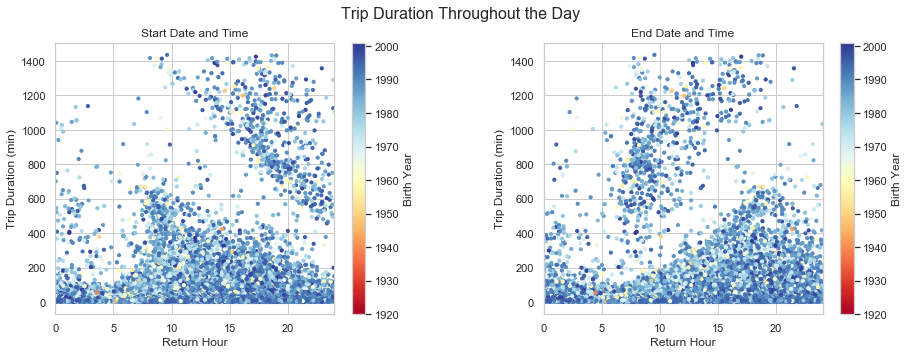

In [92]:
fig4 = plt.figure(figsize = [15, 5])
fig4.subplots_adjust(hspace=0.4, wspace=0.4)
sb.set(style="whitegrid")

fig4.add_subplot(1, 2, 1)
cm = plt.cm.get_cmap('RdYlBu')
x = (df_tripinfo.loc[df_userinfo['user_birth_year'] > 1919, "start_date_time"].dt.hour 
     + df_tripinfo.loc[df_userinfo['user_birth_year'] > 1919, "start_date_time"].dt.minute /60 
     + df_tripinfo.loc[df_userinfo['user_birth_year'] > 1919, "start_date_time"].dt.second /60/60)
y = df_tripinfo.loc[df_userinfo['user_birth_year'] > 1919, "duration_sec"] /60
z = df_userinfo.loc[df_userinfo['user_birth_year'] > 1919, 'user_birth_year']
sc = plt.scatter(x, y, c=z, cmap=cm, s=10)
cbar = plt.colorbar(sc)
plt.ylabel('Trip Duration (min)')
plt.xlabel('Return Hour')
plt.xlim(left = 0, right = 24)
cbar.set_label('Birth Year', rotation=90)
plt.title('Start Date and Time')

fig4.add_subplot(1, 2, 2)
cm = plt.cm.get_cmap('RdYlBu')
x = (df_tripinfo.loc[df_userinfo['user_birth_year'] > 1919, "end_date_time"].dt.hour 
     + df_tripinfo.loc[df_userinfo['user_birth_year'] > 1919, "end_date_time"].dt.minute /60 
     + df_tripinfo.loc[df_userinfo['user_birth_year'] > 1919, "end_date_time"].dt.second /60/60)
y = df_tripinfo.loc[df_userinfo['user_birth_year'] > 1919, "duration_sec"] /60
z = df_userinfo.loc[df_userinfo['user_birth_year'] > 1919, 'user_birth_year']
sc = plt.scatter(x, y, c=z, cmap=cm, s=10)
cbar = plt.colorbar(sc)
plt.ylabel('Trip Duration (min)')
plt.xlabel('Return Hour')
plt.xlim(left = 0, right = 24)
cbar.set_label('Birth Year', rotation=90)
plt.title('End Date and Time')

fig4.suptitle("Trip Duration Throughout the Day", fontsize = 16);